# <span style="color:brown">****BANK MARKETING: Predicting Whether The Customer Will Subscribe To Term Deposit (FIXED DEPOSIT) or not.****

# Business Use Case               

There has been a revenue decline for a Portuguese bank and they would like to know what actions to take. After investigation, they found out that the root cause is that their clients are not depositing as frequently as before. Knowing that term deposits allow banks to hold onto a deposit for a specific amount of time, so banks can invest in higher gain financial products to make a profit. In addition, banks also hold better chance to persuade term deposit clients into buying other products such as funds or insurance to further increase their revenues. As a result, the Portuguese bank would like to identify existing clients that have higher chance to subscribe for a term deposit and focus marketing efforts on such clients.


# Project Description    

Your client is a retail banking institution. Term deposits are a major source of income for a bank. A term deposit is a cash investment held at a financial institution. Your money is invested for an agreed rate of interest over a fixed amount of time, or term. The bank has various outreach plans to sell term deposits to their customers such as email marketing, advertisements, telephonic marketing and digital marketing. Telephonic marketing campaigns still remain one of the most effective way to reach out to people. However, they require huge investment as large call centers are hired to actually execute these campaigns. Hence, it is crucial to identify the customers most likely to convert beforehand so that they can be specifically targeted via call.
You are provided with the client data such as : age of the client, their job type, their marital status, etc. Along with the client data, you are also provided with the information of the call such as the duration of the call, day and month of the call, etc. Given this information, your task is to predict if the client will subscribe to term deposit.


# About The Dataset
The dataset is related with direct marketing campaigns (phone calls) of a Portuguese banking institution. The classification goal of this dataset is to predict if the client or the customer of polish banking institution will subscribe a term deposit product of the bank or not. 


# You are provided with following 2 files:
1.     train.csv : Use this dataset to train the model. This file contains all the client and call details as well as the target variable “subscribed”. You have to train your model using this file.
2.     test.csv : Use the trained model to predict whether a new set of clients will subscribe the term deposit.


# Dataset Attributes
Here is the description of all the variables:

---------bank client attributes:                 
age: age of client (numeric)                     
job : type of job (categorical: "admin.", "unknown", "unemployed", "management", "housemaid", "entrepreneur", "student", "blue-collar", "self-employed", "retired", "technician", "services")                    
marital : marital status (categorical: "married", "divorced", "single")                    
education: client highest education (categorical: "unknown", "secondary", "primary", "tertiary")                     
default: has credit in default? (binary/2-categories: "yes", "no")                   
balance: average yearly balance, in euros (numeric)                                       
housing: has housing loan? (binary/2-categories: "yes", "no")                
loan: has personal loan? (binary/2-categories: "yes", "no")               

----------related with the last contact of the current campaign:               
contact: contact communication type (categorical: "unknown", "telephone", "cellular")                  
day: last contact day of the month (numeric)                   
month: last contact month of year (categorical: "jan", "feb", "mar", ..., "nov", "dec")                 
duration: last contact duration, in seconds (numeric)  

----------- other attributes:                   
campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)          
pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric, -1 means client was not previously contacted)                        
previous: number of contacts performed before this campaign and for this client (numeric)               
poutcome: outcome of the previous marketing campaign ( categorical: 'unknown","other", "failure", "success")                


# Output variable (desired target):
•Subscribed (target): has the client subscribed a term deposit? (YES/NO)


<span style="color:red">****As from the problem statement , we get to know that we have to predict the  client subscribed a term deposit? (YES/NO), Hence it is Classification problem.
We apply classification algorithm to train , test and predict ****

<span style="color:black">****First we test ,train and predict the model on train dataset then we again test on test dataset.****

# Python Implementation-

In [919]:
#Importing necessary libraries.
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [920]:
df_train = pd.read_csv("https://raw.githubusercontent.com/dsrscientist/dataset5/main/termdeposit_train.csv")
df_train

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,26110,56,admin.,married,unknown,no,1933,no,no,telephone,19,nov,44,2,-1,0,unknown,no
1,40576,31,unknown,married,secondary,no,3,no,no,cellular,20,jul,91,2,-1,0,unknown,no
2,15320,27,services,married,secondary,no,891,yes,no,cellular,18,jul,240,1,-1,0,unknown,no
3,43962,57,management,divorced,tertiary,no,3287,no,no,cellular,22,jun,867,1,84,3,success,yes
4,29842,31,technician,married,secondary,no,119,yes,no,cellular,4,feb,380,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31642,36483,29,management,single,tertiary,no,0,yes,no,cellular,12,may,116,2,-1,0,unknown,no
31643,40178,53,management,divorced,tertiary,no,380,no,yes,cellular,5,jun,438,2,-1,0,unknown,yes
31644,19710,32,management,single,tertiary,no,312,no,no,cellular,7,aug,37,3,-1,0,unknown,no
31645,38556,57,technician,married,secondary,no,225,yes,no,telephone,15,may,22,7,337,12,failure,no


In [921]:
print(f'The rows and columns in the dataset:{df_train.shape}')
print(f'\n The columns in the dataset:{df_train.columns}')

The rows and columns in the dataset:(31647, 18)

 The columns in the dataset:Index(['ID', 'age', 'job', 'marital', 'education', 'default', 'balance',
       'housing', 'loan', 'contact', 'day', 'month', 'duration', 'campaign',
       'pdays', 'previous', 'poutcome', 'subscribed'],
      dtype='object')


In [922]:
# getting all information of dataset 
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31647 entries, 0 to 31646
Data columns (total 18 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   ID          31647 non-null  int64 
 1   age         31647 non-null  int64 
 2   job         31647 non-null  object
 3   marital     31647 non-null  object
 4   education   31647 non-null  object
 5   default     31647 non-null  object
 6   balance     31647 non-null  int64 
 7   housing     31647 non-null  object
 8   loan        31647 non-null  object
 9   contact     31647 non-null  object
 10  day         31647 non-null  int64 
 11  month       31647 non-null  object
 12  duration    31647 non-null  int64 
 13  campaign    31647 non-null  int64 
 14  pdays       31647 non-null  int64 
 15  previous    31647 non-null  int64 
 16  poutcome    31647 non-null  object
 17  subscribed  31647 non-null  object
dtypes: int64(8), object(10)
memory usage: 4.3+ MB


<span style="color:BLUE">****Observation -There are two data types present in  dataset:(int64,Object)****                   
 <span style="color:blue">****- No null values are present in any column.****

In [923]:
#Checking Duplicate values in DataFrame
print("Total Dublicate rows are:",df_train.duplicated().sum())

Total Dublicate rows are: 0


<span style="color:blue">****There is no Dublicate rows.****

In [924]:
#Checking the valuecount(i.e frequency of each value ) of each column 
for i in df_train.columns:
    print(df_train[i].value_counts())
    print("\n")

26110    1
13339    1
39681    1
15135    1
26037    1
        ..
1247     1
15584    1
25376    1
38699    1
14156    1
Name: ID, Length: 31647, dtype: int64


32    1457
31    1417
33    1406
34    1321
35    1314
      ... 
92       1
95       1
93       1
94       1
90       1
Name: age, Length: 76, dtype: int64


blue-collar      6842
management       6639
technician       5307
admin.           3631
services         2903
retired          1574
self-employed    1123
entrepreneur     1008
unemployed        905
housemaid         874
student           635
unknown           206
Name: job, dtype: int64


married     19095
single       8922
divorced     3630
Name: marital, dtype: int64


secondary    16224
tertiary      9301
primary       4808
unknown       1314
Name: education, dtype: int64


no     31062
yes      585
Name: default, dtype: int64


 0        2470
 1         137
 2         109
 4          95
 3          88
          ... 
 15120       1
-713         1
-905         1
 4722  

<span style="color:blue">****There is no Blank space present in dataset. Go ahead****

In [925]:
#Dropping ID column
df_train.drop("ID",axis=1,inplace =True)

In [926]:
#statical summary
df_train.describe()

,age,balance,day,duration,campaign,pdays,previous
count,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000
mean,40.957247,1363.890258,15.835466,258.113534,2.765697,39.576042,0.574272
std,10.625134,3028.304293,8.337097,257.118973,3.113830,99.317592,2.422529
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,73.000000,8.000000,104.000000,1.000000,-1.000000,0.000000
50%,39.000000,450.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1431.000000,21.000000,318.500000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


<span style="color:blue">****Observation-                 
The mean value is greater than median(50%) in "balance","duration","pdays" which means data is highly skewed right in these.     
Outliers are present in dataset because of high difference in 75% and max****

# <span style="color:red">Data Visualization

<span style="color:green">****Univariate Analysis****

no     27932
yes     3715
Name: subscribed, dtype: int64


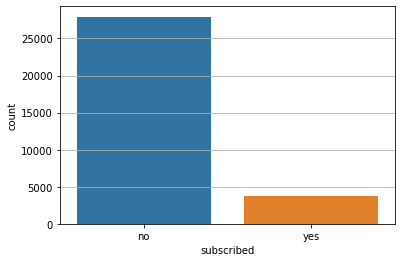

In [927]:
#Visualise the "subscribed" 
ax=sns.countplot(x="subscribed",data =df_train)
plt.grid(axis='y')
print(df_train["subscribed"].value_counts())

<span style="color:blue">****We can observe that number of subscribed is far more that number of Unsubscribe. This cause Data Imbalance, hence perform 
Oversampling on it to make it Balance.****

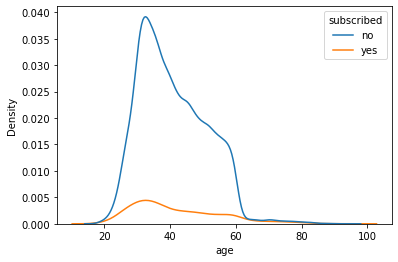

In [837]:
#Visualise the "age" 
ax=sns.kdeplot(x="age",hue="subscribed",data =df_train)

<span style="color:blue">****We can observe that people that subscribe are mostly from age (20-60).****

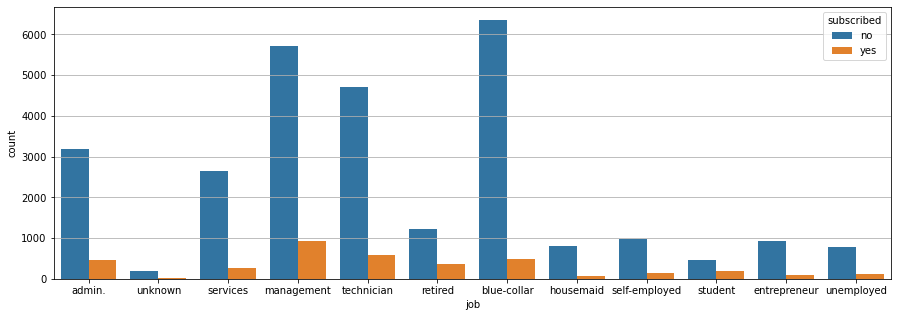

In [838]:
#Visualise the "job" 
plt.figure(figsize=(15, 5))
ax=sns.countplot(x="job",hue="subscribed",data =df_train)
plt.grid(axis='y')

<span style="color:blue">****We can observe that people who subscribed  to the term deposit the most belongs to "management" job i.e high paying job .****

married     19095
single       8922
divorced     3630
Name: marital, dtype: int64


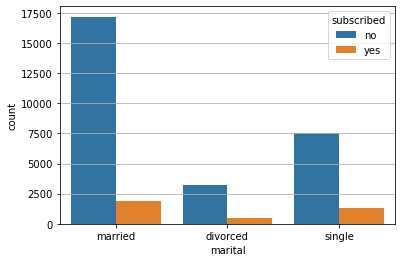

In [839]:
#Visualise the "marital" 
ax=sns.countplot(x="marital",hue="subscribed",data =df_train)
plt.grid(axis='y')
print(df_train["marital"].value_counts())

<span style="color:blue">****Married people subscribed to the term deposit most.****

secondary    16224
tertiary      9301
primary       4808
unknown       1314
Name: education, dtype: int64


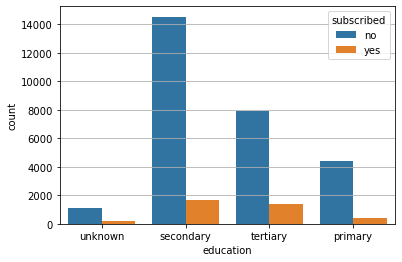

In [840]:
#Visualise the "education" 
ax=sns.countplot(x="education",hue="subscribed",data =df_train)
plt.grid(axis='y')
print(df_train["education"].value_counts())

<span style="color:blue">****We can observe that people who are educated good, subscribe more.****

no     31062
yes      585
Name: default, dtype: int64


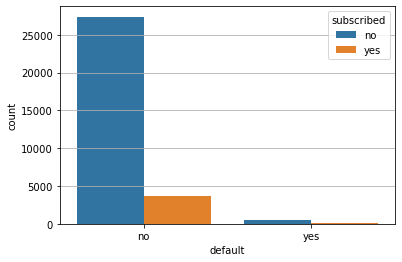

In [841]:
#Visualise the "default" 
ax=sns.countplot(x="default",hue="subscribed",data =df_train)
plt.grid(axis='y')
print(df_train["default"].value_counts())

<span style="color:blue">****We can observe that Very few clients are contacted who are defaulter & people those are dafaulter subscribe to the term deposite less.****
    

cellular     20423
unknown       9177
telephone     2047
Name: contact, dtype: int64


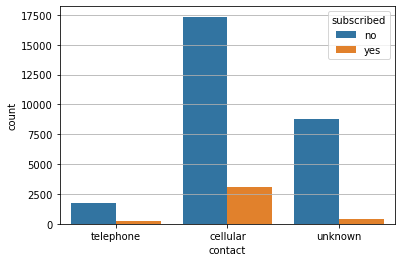

In [842]:
#Visualise the "contact" 
ax=sns.countplot(x="contact",hue="subscribed",data =df_train)
plt.grid(axis='y')
print(df_train["contact"].value_counts())

<span style="color:blue">****We can observe that people those are contacted through phone/celluar subscribe to the term deposite more.****

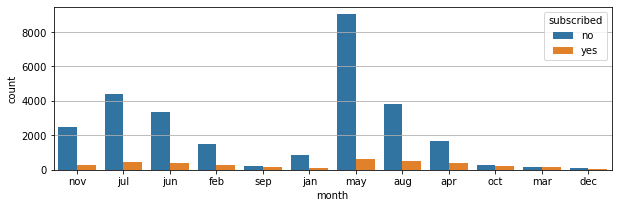

In [843]:
#Visualise the "month" 
plt.figure(figsize =(10,3))
sns.countplot(x="month",hue="subscribed",data =df_train)
plt.grid(axis='y')

<span style="color:blue">***Most of the clients (approx 1/3 of total) are contacted in the month of May but the success rate is very less and there is no significant relation.****

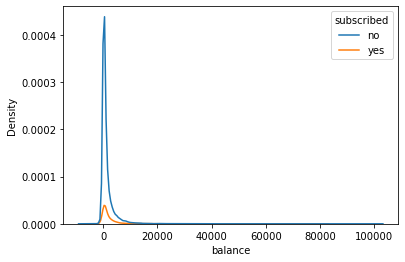

In [844]:
#Visualise the "balance" 
ax=sns.kdeplot(x="balance",hue="subscribed",data =df_train)

<span style="color:blue">****There is no significant relation between balance and subscribe (because people have balance but they didn't subscribe to the term deposite more. Lets check Correlation and then drop it****

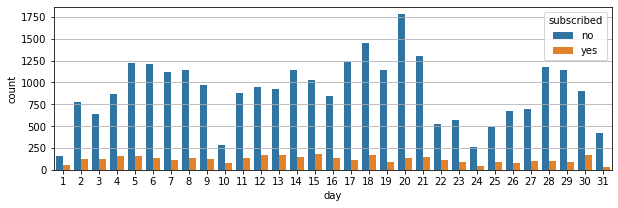

In [845]:
#Visualise the "day" 
plt.figure(figsize =(10,3))
sns.countplot(x="day",hue="subscribed",data =df_train)
plt.grid(axis='y')

<span style="color:blue">****There is nothing relation between day & subscribed. Drop it later****

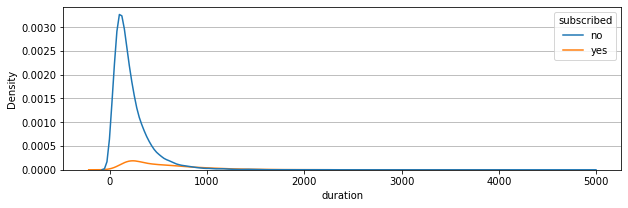

In [846]:
#Visualise the "duration" 
plt.figure(figsize =(10,3))
sns.kdeplot(x="duration",hue="subscribed",data =df_train)
plt.grid(axis='y')

<span style="color:blue">****Less duration can make strong impact to subscribe more.****

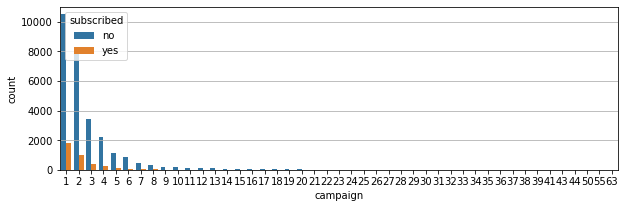

In [847]:
#Visualise the "campaign" 
plt.figure(figsize =(10,3))
sns.countplot(x="campaign",hue="subscribed",data =df_train)
plt.grid(axis='y')

<span style="color:blue">****Most subscribed people has less campaign.****

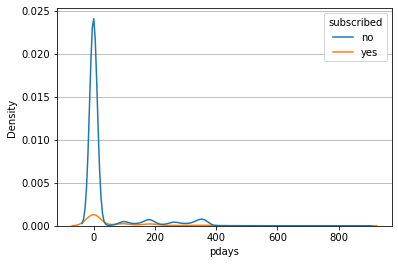

In [848]:
#Visualise the "pdays" 
sns.kdeplot(x="pdays",hue="subscribed",data =df_train)
plt.grid(axis='y')

<span style="color:blue">****There is no significant relation.****

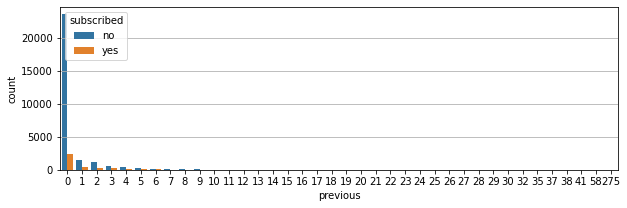

In [849]:
#Visualise the "previous" 
plt.figure(figsize =(10,3))
sns.countplot(x="previous",hue="subscribed",data =df_train)
plt.grid(axis='y')

<span style="color:blue">****Subscribed person contacted less before this campaign****

subscribed,no,yes,Total
poutcome,,,
failure,2931,431,3362
other,1071,217,1288
success,374,694,1068
unknown,23556,2373,25929
Total,27932,3715,31647


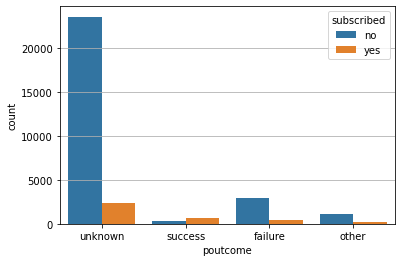

In [850]:
#Visualise the "poutcome" 
sns.countplot(x="poutcome",hue="subscribed",data =df_train)
plt.grid(axis='y')

#statical analysis
pd.crosstab(df_train.poutcome, df_train.subscribed, margins=True, margins_name="Total")

<span style="color:blue">****Most of the clients contacted have previous outcome as 'unknown'.****

<span style="color:red">****Bivariate Analysis****

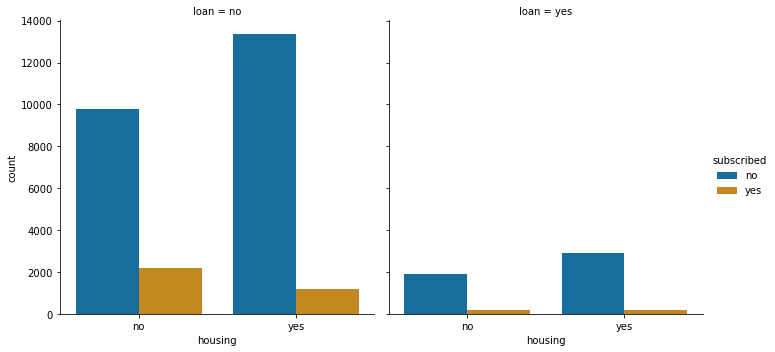

In [851]:
#checking housing and loan  
sns.catplot(x="housing",col="loan",hue="subscribed",data=df_train, kind= "count", palette= "colorblind")

<span style="color:blue">****We can observe that sucess rate is very less when customer has both housing and personal loan.****

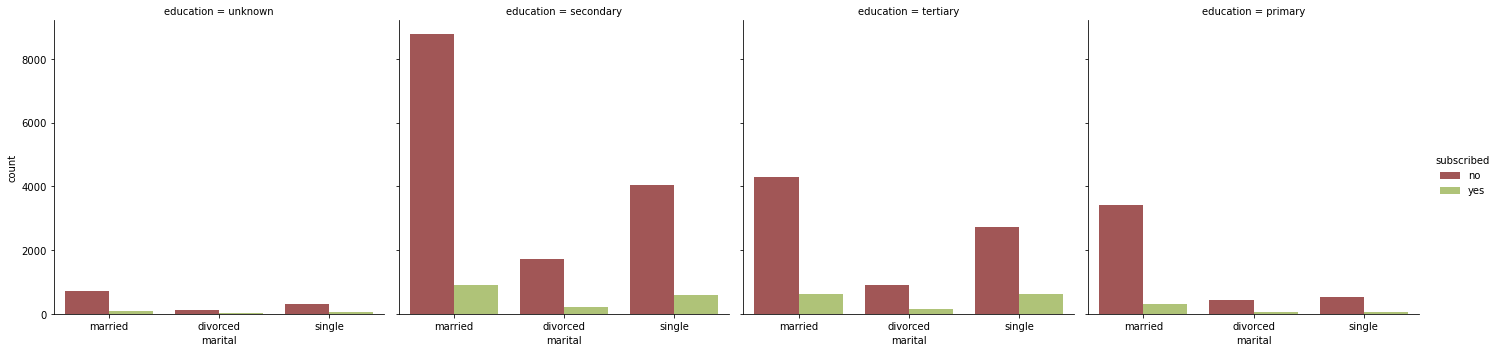

In [852]:
#checking marital and education  
sns.catplot(x="marital",col="education",hue="subscribed",data=df_train, kind= "count", palette= "tab20b_r")

<span style="color:blue">****Most of the people who are contacted have tertiray or secondary education and are married too.****


<span style="color:red">****Multivariate Analysis****

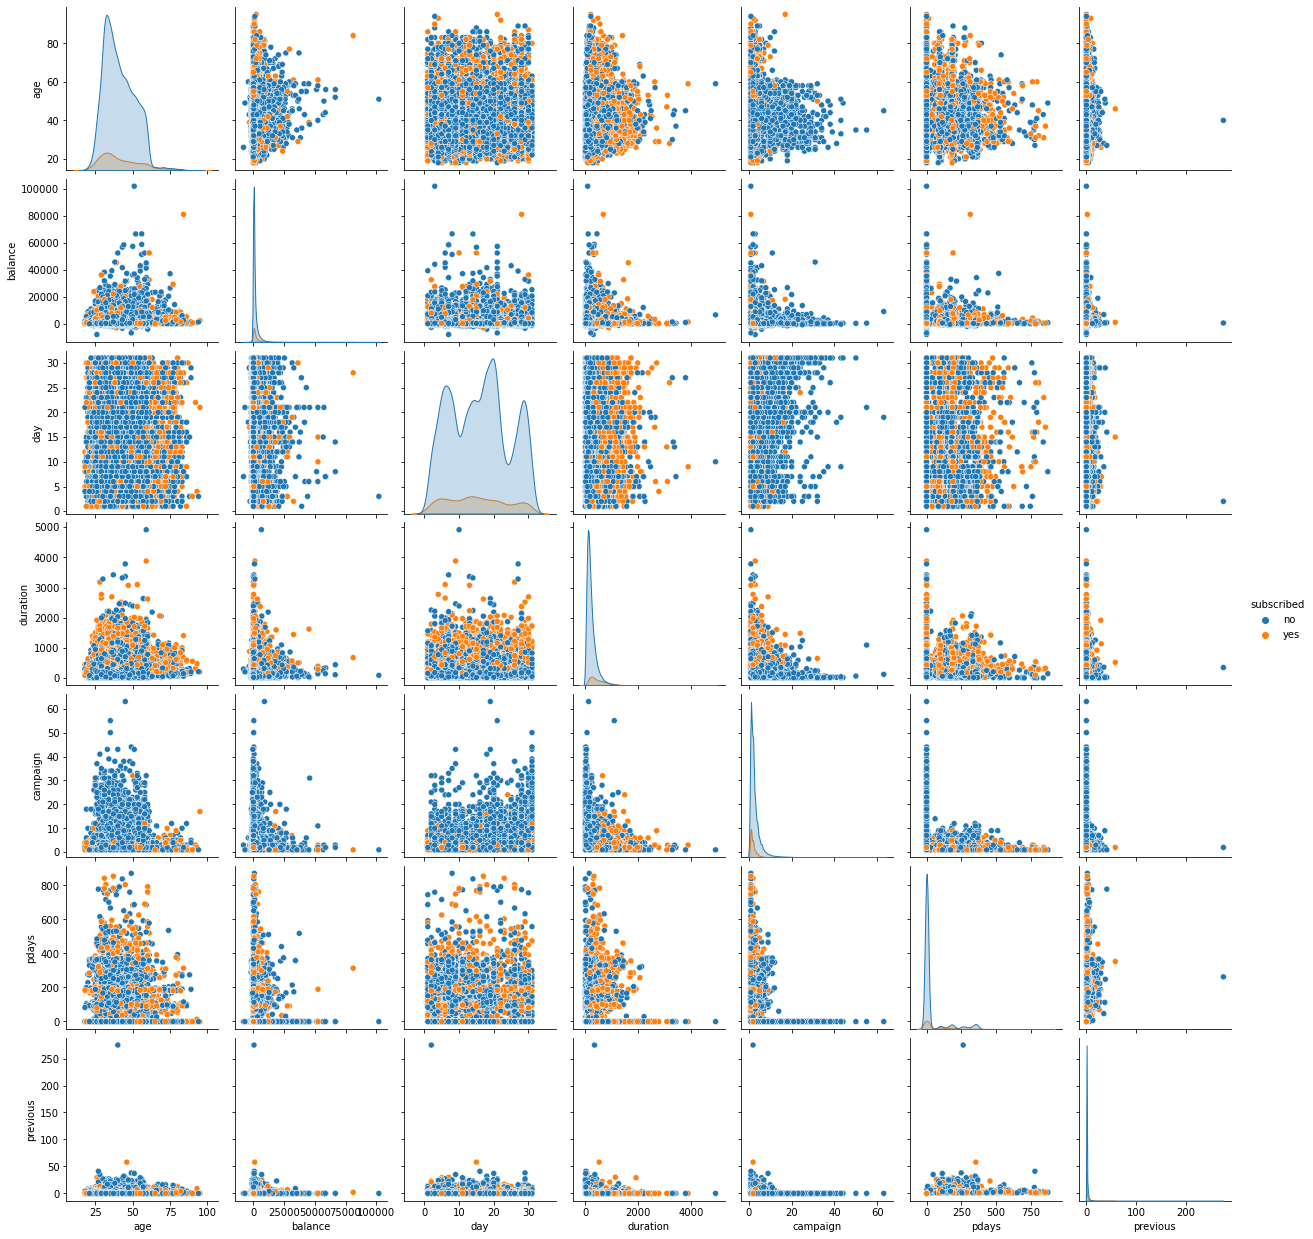

In [349]:
#checking subscribed with other 
sns.pairplot( df_train, hue= "subscribed")
plt.show()

<span style="color:blue">****Overlapping occurs in most of the variables.           
Pair plots of age-campaign and day-campaign are much efficient in distinguishing between different classes with very few overlapes.****

In [928]:
#Seperating Numerical and Categorical column

#checking for Categorical column
categorical_col=[]
for i in df_train.dtypes.index:
    if df_train.dtypes[i]=="object":
        categorical_col.append(i)
print("categorical_column",categorical_col)
print("\n")

#checking for Numerical column
numerical_col=[]
for i in df_train.dtypes.index:
    if df_train.dtypes[i]!="object":
        numerical_col.append(i)
print("Numerical_column",numerical_col)

categorical_column ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome', 'subscribed']


Numerical_column ['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']


# <span style="color:red">****Checking for outliers****

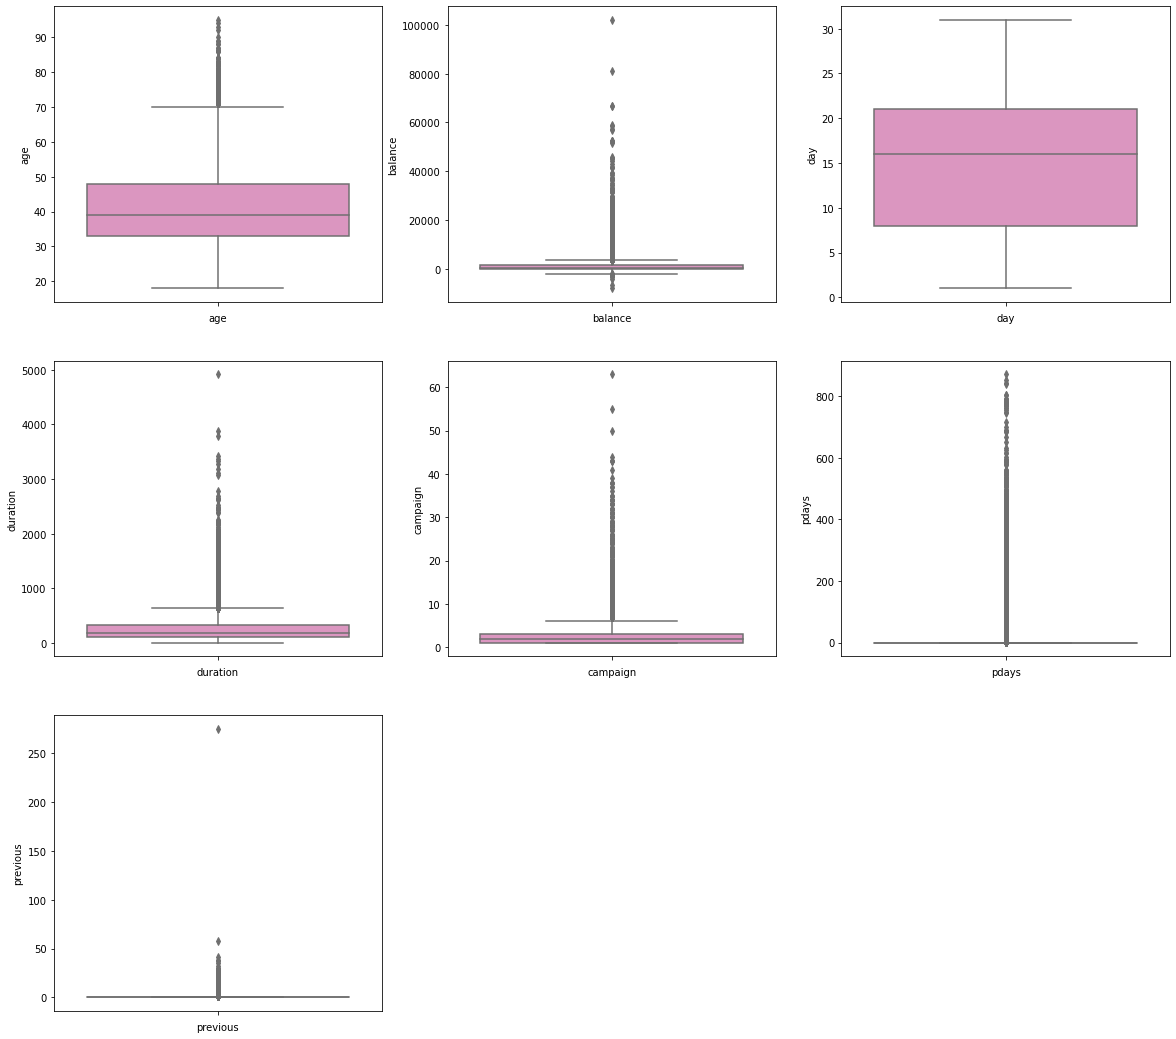

In [929]:
#checking outliers by using Boxplot in numerical_col only
plt.figure(figsize=(20,25))
p=1
for i in numerical_col:
    if p<=8:
        plt.subplot(4,3,p)
        sns.boxplot(y=df_train[i], palette="Set2_r")
        plt.xlabel(i)
    p+=1
plt.show()


<span style="color:blue">****Observation- Almost all Features has Outliers.Lets remove Outliers by IQR method or Z-score method.***

<span style="color:red">1st Method: Z score

In [930]:
from scipy.stats import zscore
outliers_feature=df_train[['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']]
z=np.abs(zscore(outliers_feature)) #.abs() to remove negative values
z

,age,balance,day,duration,campaign,pdays,previous
0,1.415793,0.187933,0.379579,0.832754,0.245906,0.408555,0.237059
1,0.937156,0.449397,0.499526,0.649957,0.245906,0.408555,0.237059
2,1.313627,0.156159,0.259631,0.070449,0.567059,0.408555,0.237059
3,1.509911,0.635055,0.739422,2.368149,0.567059,0.447299,1.001336
4,0.937156,0.411091,1.419637,0.474054,0.567059,0.408555,0.237059
...,...,...,...,...,...,...,...
31642,1.125392,0.450388,0.460055,0.552724,0.245906,0.408555,0.237059
31643,1.133439,0.324903,1.299690,0.699635,0.245906,0.408555,0.237059
31644,0.843038,0.347358,1.059794,0.859979,0.075247,0.408555,0.237059
31645,1.509911,0.376088,0.100212,0.918319,1.359859,2.994723,4.716521


In [931]:
#Z-score>3
np.where(z>3)

(array([   21,    26,    36, ..., 31622, 31645, 31646], dtype=int64),
 array([4, 1, 5, ..., 5, 6, 3], dtype=int64))

In [932]:
#now removing the data above zscore and creating a new dataframe
df1_train=df_train[(z<3).all(axis=1)]
print("New Dataframe having rows and column: " ,df1_train.shape)
print("New Dataframe column's name: " ,df1_train.columns)


New Dataframe having rows and column:  (28124, 17)
New Dataframe column's name:  Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'subscribed'],
      dtype='object')


In [933]:
print("Data Loss Percentage with Z-score method:",((df_train.shape[0]-df1_train.shape[0])/df_train.shape[0])*100)

Data Loss Percentage with Z-score method: 11.132176825607482


<span style="color:red">2nd Method: IQR (Inter Quantile Method)

In [934]:
#1st Quantile
q1=outliers_feature.quantile(0.25)

#3rd Quantile
q3=outliers_feature.quantile(0.75)

#calculating IQR
iqr=q3-q1

df2_train=df_train[~((df_train < (q1 - 1.5*iqr ))|(df_train > (q3 + 1.5*iqr ))).any(axis=1)]

In [935]:
print("Data Loss Percentage  with IQR method :",((df_train.shape[0]-df2_train.shape[0])/df_train.shape[0])*100)

Data Loss Percentage  with IQR method : 37.437987802951305


<span style="color:blue">****Conclusion -Data Loss Percentage  with IQR method is very high as compared with Z-score . So i go with z-score**** 

In [936]:
#Storing Dataframe with Z-score method in old dataframe
df_train=df1_train

In [937]:
#reset the index after removing outliers values
df_train.reset_index(drop=True,inplace=True)

In [938]:
df_train.shape

(28124, 17)

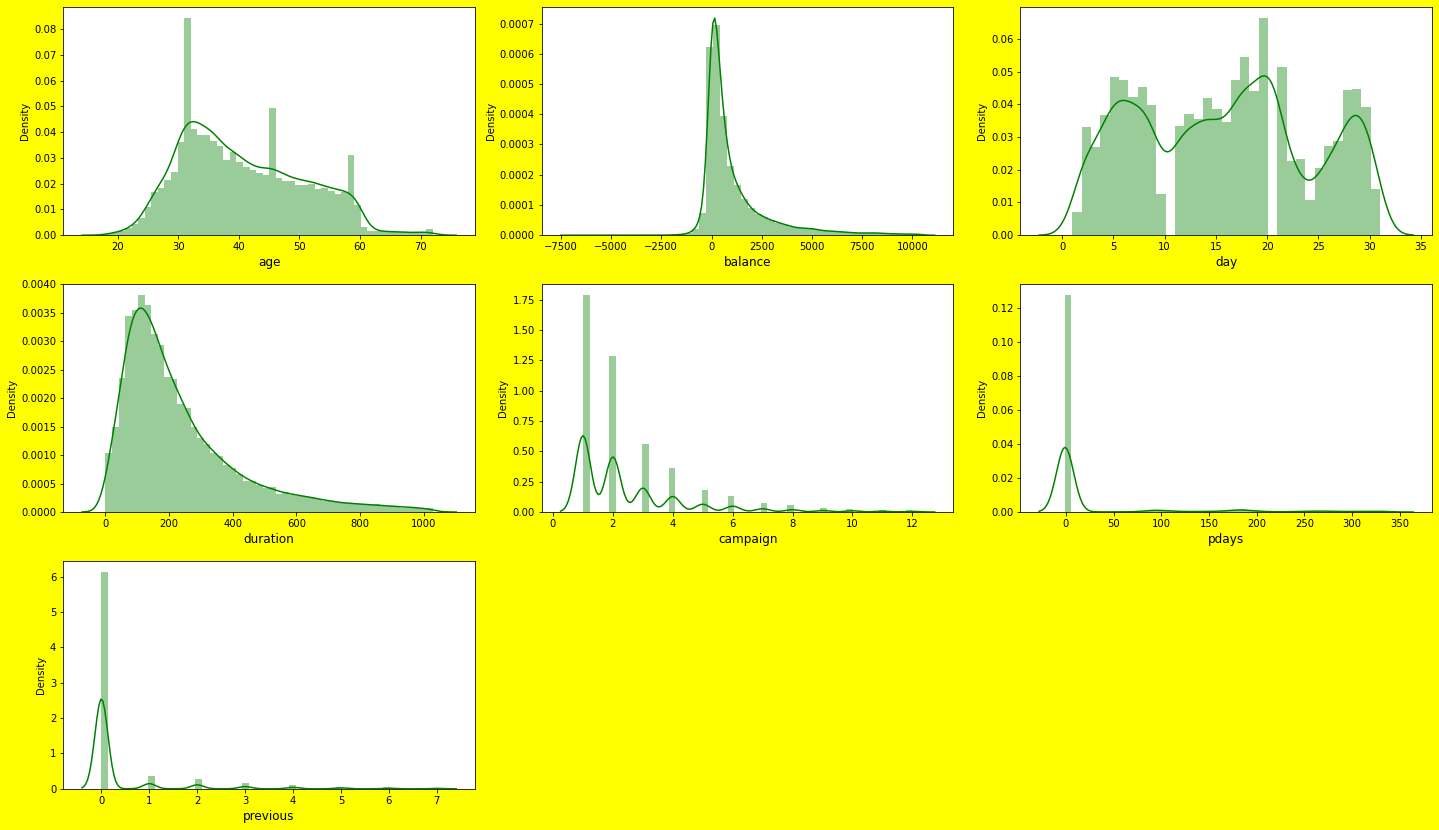

In [939]:
#Checking for data distribution in features only
plt.figure(figsize = (20,15), facecolor = 'yellow')
plotnumber = 1 #this is an initiator

for column in numerical_col:
    if plotnumber <=7: 
        ax = plt.subplot (4,3,plotnumber)
        sns.distplot (df_train[column],color='g')
        plt.xlabel (column, fontsize =12)
    plotnumber +=1
plt.tight_layout()

<span style="color:blue">****We can observe that data is not distributed normally.****

# <span style="color:red">****Removing Skewness****

In [940]:
df_train.skew() 

age         0.438496
balance     2.437605
day         0.073752
duration    1.596552
campaign    2.059359
pdays       2.824483
previous    3.691573
dtype: float64

<span style="color:BLUE">****There is Skewness present in balance,duration,previous and  can be removed by following methods- log, square root,cube root or inverse transformation.****

In [941]:
#Removing Skewness using cuberoot method
df_train['balance']=np.cbrt(df_train['balance'])
df_train['duration']=np.cbrt(df_train['duration'])
df_train['previous']=np.cbrt(df_train['previous'])
df_train.skew()

age         0.438496
balance    -0.435065
day         0.073752
duration    0.310493
campaign    2.059359
pdays       2.824483
previous    2.299676
dtype: float64

In [942]:
#Removing Skewness using cuberoot method
df_train['campaign']=np.cbrt(df_train['campaign'])
df_train['pdays']=np.cbrt(df_train['pdays'])
df_train['previous']=np.cbrt(df_train['previous'])
df_train.skew()

age         0.438496
balance    -0.435065
day         0.073752
duration    0.310493
campaign    0.997328
pdays       2.186152
previous    2.103894
dtype: float64

<span style="color:blue">****We get Nan value when we perform same operation again,hence we go with this value.****

<AxesSubplot:xlabel='balance', ylabel='Density'>

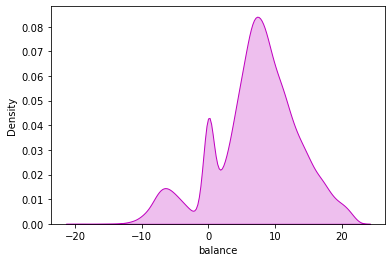

In [943]:
#Lets vsualize how the data has been been distributed after removing skewness
sns.distplot(df_train['balance'],color='m',kde_kws ={"shade":True},hist=False)


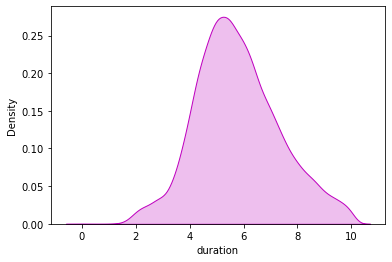

In [944]:
sns.distplot(df_train['duration'],color='m',kde_kws ={"shade":True},hist=False)
plt.show()

# <span style="color:Purple">****Encoding Categorical Value in Numerical Value****

In [945]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
for column in df_train.columns:
    if df_train[column].dtype == 'object':
        df_train[column] = label_encoder.fit_transform(df_train[column])

# <span style="color:purple">****Correlation between target variable and Independent variable****

In [946]:
#checking Correlation 
df_train.corr()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
age,1.000000,-0.030552,-0.411087,-0.100363,-0.009616,0.079543,-0.155557,0.005488,0.029036,-0.009937,-0.042070,-0.031297,0.040856,-0.004609,-0.000965,0.000751,-0.007172
job,-0.030552,1.000000,0.067076,0.169526,-0.007400,0.026094,-0.122764,-0.038629,-0.084375,0.020514,-0.088359,-0.003418,0.007853,0.012431,0.016979,-0.011441,0.036743
marital,-0.411087,0.067076,1.000000,0.109940,-0.012221,0.034716,-0.026593,-0.045159,-0.042070,-0.008386,-0.003321,0.016357,-0.030809,0.021377,0.025100,-0.015021,0.056387
education,-0.100363,0.169526,0.109940,1.000000,-0.007467,0.064140,-0.096581,-0.047982,-0.121975,0.017677,-0.056416,0.002066,-0.009684,0.048220,0.057087,-0.041203,0.075838
default,-0.009616,-0.007400,-0.012221,-0.007467,1.000000,-0.209161,-0.014763,0.081270,0.014592,0.007138,0.007290,-0.000054,0.012757,-0.038843,-0.040929,0.035944,-0.014500
balance,0.079543,0.026094,0.034716,0.064140,-0.209161,1.000000,-0.070652,-0.140556,-0.055374,-0.013262,-0.004558,0.024577,-0.023629,0.090450,0.096577,-0.082925,0.094746
housing,-0.155557,-0.122764,-0.026593,-0.096581,-0.014763,-0.070652,1.000000,0.031251,0.215776,-0.015138,0.274293,0.011891,-0.043774,0.033460,0.012634,-0.049579,-0.145640
loan,0.005488,-0.038629,-0.045159,-0.047982,0.081270,-0.140556,0.031251,1.000000,-0.012620,0.011949,0.026898,-0.006263,-0.001319,-0.014711,-0.018143,0.001714,-0.074803
contact,0.029036,-0.084375,-0.042070,-0.121975,0.014592,-0.055374,0.215776,-0.012620,1.000000,-0.030543,0.392662,-0.034850,-0.001789,-0.261336,-0.263560,0.248117,-0.158031
day,-0.009937,0.020514,-0.008386,0.017677,0.007138,-0.013262,-0.015138,0.011949,-0.030543,1.000000,0.017204,-0.039272,0.132730,-0.051627,-0.049699,0.045799,-0.030122


<AxesSubplot:>

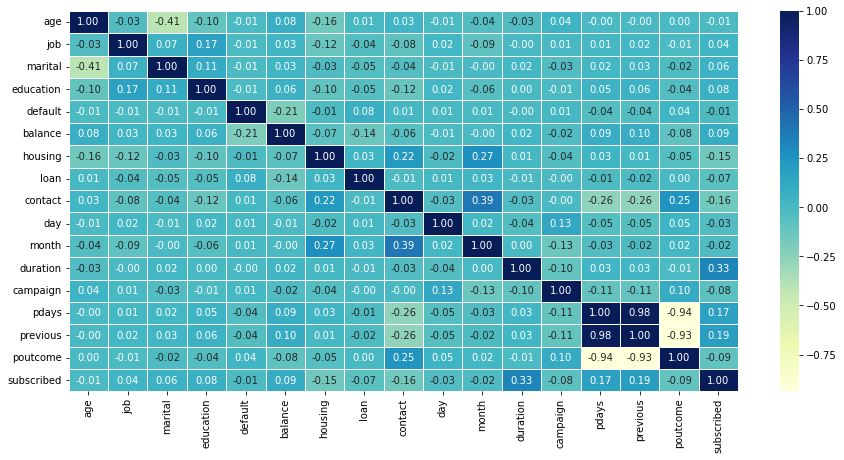

In [947]:
#checking the corelation  again using heatmaps (only absolute values)
plt.figure(figsize = (15,7))
sns.heatmap(df_train.corr(), annot = True, linewidths=0.5, fmt='.2f',cmap = "YlGnBu")

<span style="color:blue">****We can see that poutcome and pdays are highly correlated which can cause
multicollinearity we will check again and remove it later.****

<AxesSubplot:xlabel='poutcome', ylabel='pdays'>

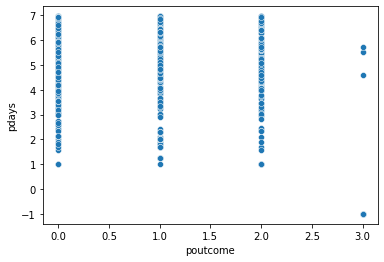

In [948]:
#Check multicollinearity by visualite it
sns.scatterplot(x="poutcome",y="pdays",data=df_train,palette="colorblind")

<span style="color:blue">****We can see that poutcome and pdays are not correlated(having no linear relation) and does not cause
multicollinearity.****

In [949]:
#checking Correlation with "quality" Column
df_train.corr().subscribed.sort_values()

contact      -0.158031
housing      -0.145640
poutcome     -0.091071
campaign     -0.081699
loan         -0.074803
day          -0.030122
month        -0.022564
default      -0.014500
age          -0.007172
job           0.036743
marital       0.056387
education     0.075838
balance       0.094746
pdays         0.167936
previous      0.188296
duration      0.328075
subscribed    1.000000
Name: subscribed, dtype: float64

<span style="color:blue">****We can see that contact,housing,poutcome,campaign are negativly correlated with label.****

# <span style="color:red">****Seperating Feature and Label**** 

In [950]:
#Seperating Feature and label into x_train and y_train
x_train=df_train.drop(["subscribed"],axis=1)
y_train=df_train["subscribed"]

print("Feature Dimension :" ,x_train.shape)
print("Target Dimension :" ,y_train.shape)

Feature Dimension : (28124, 16)
Target Dimension : (28124,)


# <span style="color:red">****Feature Scaling Using Standard Scaler**** 

In [951]:
# data scaling 
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_scaled_train = pd.DataFrame(scaler.fit_transform(x_train),columns=x_train.columns)
x_scaled_train

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,1.522811,-1.321707,-0.276906,2.376931,-0.139916,0.857969,-1.106956,-0.447423,0.359876,0.374734,1.175534,-1.435964,-0.066617,-0.397003,-0.401733,0.377632
1,-0.957368,2.023504,-0.276906,-0.301360,-0.139916,-0.920001,-1.106956,-0.447423,-0.735486,0.493893,-0.164394,-0.816377,-0.066617,-0.397003,-0.401733,0.377632
2,-1.354197,0.807064,-0.276906,-0.301360,-0.139916,0.400458,0.903378,-0.447423,-0.735486,0.255575,-0.164394,0.282780,-0.946471,-0.397003,-0.401733,0.377632
3,1.622018,-0.105266,-1.927894,1.037785,-0.139916,1.247239,-1.106956,-0.447423,-0.735486,0.732212,0.170588,2.409314,-0.946471,1.961651,2.594007,-0.766204
4,-0.957368,1.415284,-0.276906,-0.301360,-0.139916,-0.358840,0.903378,-0.447423,-0.735486,-1.412653,-0.834358,0.941491,-0.946471,-0.397003,-0.401733,0.377632
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28119,0.233118,-0.105266,1.374081,-0.301360,-0.139916,1.166942,-1.106956,-0.447423,1.455237,0.493893,0.170588,-1.706902,1.041930,-0.397003,-0.401733,0.377632
28120,-0.362125,1.415284,1.374081,1.037785,-0.139916,0.612958,-1.106956,-0.447423,1.455237,-1.174334,0.170588,1.181141,-0.066617,-0.397003,-0.401733,0.377632
28121,-1.155782,-0.105266,1.374081,1.037785,-0.139916,-1.152806,0.903378,-0.447423,-0.735486,-0.459380,0.840552,-0.573652,-0.066617,-0.397003,-0.401733,0.377632
28122,1.225189,-0.105266,-1.927894,1.037785,-0.139916,0.016372,-1.106956,2.235019,-0.735486,-1.293493,0.170588,1.166382,-0.066617,-0.397003,-0.401733,0.377632


# <span style="color:red">****Detecting Multicollinearity Using a Variance Inflation Factor (VIF)****

In [952]:
#finding VIF in each scaled column i.e x_scaled.shape[1](1/1- R^2 )

from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()

vif["VIF"] = [variance_inflation_factor(x_scaled_train.values, i) for i in range(len(x_scaled_train.columns))]
vif["Features"] = x_scaled_train.columns

vif

,VIF,Features
0,1.271593,age
1,1.049322,job
2,1.230172,marital
3,1.067659,education
4,1.050677,default
5,1.091755,balance
6,1.186322,housing
7,1.030885,loan
8,1.330388,contact
9,1.026275,day


<span style="color:blue">****Conclusion - We will drop 3 column "poutcome","previous","pdays" which shows high collinearity.****

In [953]:
#Dropping poutcome,campaign,loan
x_scaled_train.drop(["poutcome","previous","pdays"],axis=1,inplace=True)
x_scaled_train.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign'],
      dtype='object')

# <span style="color:purple">****Data Balance by Oversampling****

In [954]:
from imblearn.over_sampling import SMOTE
SM = SMOTE()
x1,y1 = SM.fit_resample(x_scaled_train,y_train)

y1.value_counts()

0    25264
1    25264
Name: subscribed, dtype: int64

<span style="color:blue">****Conclusion -Hence Data is balanced .****

# <span style="color:red">****Split the data into training and testing sets****

In [955]:
# Split the data into training and testing sets 
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split (x1, y1, test_size = .30, random_state = 48)
print("Total Size Of Feature in Dataset :",x1.shape)
print("Total Size Of Training Feature Dataset : " ,x_train.shape)
print("Total Size Of Testing Feature Dataset : ", x_test.shape)

print("Total Size Of Label in Dataset :",y1.shape)
print("Total Size Of Training Label Dataset : " ,y_train.shape)
print("Total Size Of Testing Label Dataset : ", y_test.shape)

Total Size Of Feature in Dataset : (50528, 13)
Total Size Of Training Feature Dataset :  (35369, 13)
Total Size Of Testing Feature Dataset :  (15159, 13)
Total Size Of Label in Dataset : (50528,)
Total Size Of Training Label Dataset :  (35369,)
Total Size Of Testing Label Dataset :  (15159,)


# <span style="color:red">****------------------Models--------------------****

# LogisticRegression

In [787]:
from sklearn.linear_model import LogisticRegression
# Create a logistic regression model
logreg = LogisticRegression()

# Fit the model on the training data
logreg.fit(x_train, y_train)
# Predict the target variable for the train data
y_pred_train=logreg.predict(x_train)
# Predict the target variable for the test data
y_pred = logreg.predict(x_test) 


# Model Evaluation
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, roc_auc_score
# Evaluate the model's performance
print("Accuracy on train data:", accuracy_score(y_train, y_pred_train))
print("Accuracy on test data:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy on train data: 0.8039526138709039
Accuracy on test data: 0.8028893726499109
Confusion Matrix:
 [[5952 1656]
 [1332 6219]]
Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.78      0.80      7608
           1       0.79      0.82      0.81      7551

    accuracy                           0.80     15159
   macro avg       0.80      0.80      0.80     15159
weighted avg       0.80      0.80      0.80     15159



# KNeighborsClassifier

In [788]:
from sklearn.neighbors import KNeighborsClassifier
knn= KNeighborsClassifier()
knn.fit(x_train, y_train)

# Predict the target variable for the train data
y_pred_train=knn.predict(x_train)
# Predict the target variable for the test data
y_pred = knn.predict(x_test) 

# Evaluate the model's performance
print("Accuracy on train data:", accuracy_score(y_train, y_pred_train))
print("Accuracy on test data:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy on train data: 0.9291752664762928
Accuracy on test data: 0.904017415396794
Confusion Matrix:
 [[6202 1406]
 [  49 7502]]
Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.82      0.90      7608
           1       0.84      0.99      0.91      7551

    accuracy                           0.90     15159
   macro avg       0.92      0.90      0.90     15159
weighted avg       0.92      0.90      0.90     15159



# DecisionTreeClassifier

In [789]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
dtc.fit(x_train, y_train)

# Predict the target variable for the train data
y_pred_train=dtc.predict(x_train)
# Predict the target variable for the test data
y_pred = dtc.predict(x_test) 


# Evaluate the model's performance
print("Accuracy on train data:", accuracy_score(y_train, y_pred_train))
print("Accuracy on test data:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy on train data: 1.0
Accuracy on test data: 0.9107460914308332
Confusion Matrix:
 [[6871  737]
 [ 616 6935]]
Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.90      0.91      7608
           1       0.90      0.92      0.91      7551

    accuracy                           0.91     15159
   macro avg       0.91      0.91      0.91     15159
weighted avg       0.91      0.91      0.91     15159



# SVM

In [790]:
from sklearn.svm import SVC
svc = SVC()
svc.fit(x_train, y_train)

# Predict the target variable for the train data
y_pred_train=svc.predict(x_train)
# Predict the target variable for the test data
y_pred = svc.predict(x_test) 

# Evaluate the model's performance
print("Accuracy on train data:", accuracy_score(y_train, y_pred_train))
print("Accuracy on test data:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy on train data: 0.8638072888687834
Accuracy on test data: 0.8552674978560592
Confusion Matrix:
 [[6024 1584]
 [ 610 6941]]
Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.79      0.85      7608
           1       0.81      0.92      0.86      7551

    accuracy                           0.86     15159
   macro avg       0.86      0.86      0.85     15159
weighted avg       0.86      0.86      0.85     15159



# AdaBoostClassifier

In [791]:
from sklearn.ensemble import AdaBoostClassifier
ada = AdaBoostClassifier()
ada.fit(x_train, y_train)

# Predict the target variable for the train data
y_pred_train=ada.predict(x_train)
# Predict the target variable for the test data
y_pred = ada.predict(x_test) 

# Evaluate the model's performance
print("Accuracy on train data:", accuracy_score(y_train, y_pred_train))
print("Accuracy on test data:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy on train data: 0.8723175662303146
Accuracy on test data: 0.8694504914572201
Confusion Matrix:
 [[6517 1091]
 [ 888 6663]]
Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.86      0.87      7608
           1       0.86      0.88      0.87      7551

    accuracy                           0.87     15159
   macro avg       0.87      0.87      0.87     15159
weighted avg       0.87      0.87      0.87     15159



# RandomForestClassifier

In [956]:
from sklearn.ensemble import RandomForestClassifier
RFC = RandomForestClassifier()
RFC.fit(x_train, y_train)

# Predict the target variable for the train data
y_pred_train=RFC.predict(x_train)
# Predict the target variable for the test data
y_pred = RFC.predict(x_test) 

# Evaluate the model's performance
print("Accuracy on train data:", accuracy_score(y_train, y_pred_train))
print("Accuracy on test data:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy on train data: 1.0
Accuracy on test data: 0.9503265386898871
Confusion Matrix:
 [[7068  540]
 [ 213 7338]]
Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.93      0.95      7608
           1       0.93      0.97      0.95      7551

    accuracy                           0.95     15159
   macro avg       0.95      0.95      0.95     15159
weighted avg       0.95      0.95      0.95     15159



# GradientBoostingClassifier

In [793]:
from sklearn.ensemble import GradientBoostingClassifier 
gbr = GradientBoostingClassifier()
gbr.fit(x_train, y_train)

# Predict the target variable for the train data
y_pred_train=gbr.predict(x_train)
# Predict the target variable for the test data
y_pred = gbr.predict(x_test) 

# Evaluate the model's performance
print("Accuracy on train data:", accuracy_score(y_train, y_pred_train))
print("Accuracy on test data:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy on train data: 0.909214283694761
Accuracy on test data: 0.9043472524572861
Confusion Matrix:
 [[6648  960]
 [ 490 7061]]
Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.87      0.90      7608
           1       0.88      0.94      0.91      7551

    accuracy                           0.90     15159
   macro avg       0.91      0.90      0.90     15159
weighted avg       0.91      0.90      0.90     15159



# <span style="color:green">Here we see that RandomForestClassifier works the best in this dataset with accuracy 95% approx and also has less Type1 and Type2 Error.

# <span style="color:red">****Cross-Validation score- to check if the model is overfitting****

In [489]:
from sklearn.model_selection import cross_val_score

In [490]:
#LogisticRegression
#For smaller datasets, use k=5 or k=10. For larger datasets, use k=10 or k=20.
print("Cross-Validation score of each fold of Dataset:",cross_val_score(logreg,x1,y1,cv=5))
print("Overall Cross-Validation score :",cross_val_score(logreg,x1,y1,cv=5).mean())

Cross-Validation score of each fold of Dataset: [0.79625965 0.80674847 0.79992084 0.8091044  0.80445324]
Overall Cross-Validation score : 0.8032973195655003


In [491]:
#KNeighborsClassifier
#For smaller datasets, use k=5 or k=10. For larger datasets, use k=10 or k=20.
print("Cross-Validation score of each fold of Dataset:",cross_val_score(knn,x1,y1,cv=5))
print("Overall Cross-Validation score :",cross_val_score(knn,x1,y1,cv=5).mean())

Cross-Validation score of each fold of Dataset: [0.90678805 0.90787651 0.9113398  0.91232063 0.91053934]
Overall Cross-Validation score : 0.9097728648321851


In [492]:
#GradientBoostingClassifier
#For smaller datasets, use k=5 or k=10. For larger datasets, use k=10 or k=20.
print("Cross-Validation score of each fold of Dataset:",cross_val_score(gbr,x1,y1,cv=5))
print("Overall Cross-Validation score :",cross_val_score(gbr,x1,y1,cv=5).mean())

Cross-Validation score of each fold of Dataset: [0.84652682 0.91628735 0.91945379 0.92281049 0.91479466]
Overall Cross-Validation score : 0.9039746211190574


In [493]:
#DecisionTreeClassifier
#For smaller datasets, use k=5 or k=10. For larger datasets, use k=10 or k=20.
print("Cross-Validation score of each fold of Dataset:",cross_val_score(dtc,x1,y1,cv=5))
print("Overall Cross-Validation score :",cross_val_score(dtc,x1,y1,cv=5).mean())

Cross-Validation score of each fold of Dataset: [0.84751633 0.92172967 0.92182862 0.92647204 0.92360218]
Overall Cross-Validation score : 0.9065672931742922


In [823]:
#SVC
#For smaller datasets, use k=5 or k=10. For larger datasets, use k=10 or k=20.
print("Cross-Validation score of each fold of Dataset:",cross_val_score(svc,x1,y1,cv=5))
print("Overall Cross-Validation score :",cross_val_score(svc,x1,y1,cv=5).mean())

Cross-Validation score of each fold of Dataset: [0.84652682 0.85731249 0.85721354 0.86689758 0.86006927]
Overall Cross-Validation score : 0.8576039375984188


In [435]:
#AdaBoostClassifier
#For smaller datasets, use k=5 or k=10. For larger datasets, use k=10 or k=20.
print("Cross-Validation score of each fold of Dataset:",cross_val_score(ada,x1,y1,cv=5))
print("Overall Cross-Validation score :",cross_val_score(ada,x1,y1,cv=5).mean())

Cross-Validation score of each fold of Dataset: [0.82139323 0.8761132  0.88165446 0.89035131 0.8779812 ]
Overall Cross-Validation score : 0.8694986806354376


In [570]:
#RandomForestClassifier
#For smaller datasets, use k=5 or k=10. For larger datasets, use k=10 or k=20.
print("Cross-Validation score of each fold of Dataset:",cross_val_score(RFC,x1,y1,cv=5))
print("Overall Cross-Validation score :",cross_val_score(RFC,x1,y1,cv=5).mean())

Cross-Validation score of each fold of Dataset: [0.90896497 0.9601227  0.96101326 0.96457199 0.96031667]
Overall Cross-Validation score : 0.9515718519761777


# <span style="color:green">Conclusion- On basis of CV score we can conclude that RandomForestClassifier accuracy is 95% with minute differnce so we select RandomForestClassifier

<span style="color:red">****AUC- RUC Curve**** 

In [824]:
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import plot_roc_curve

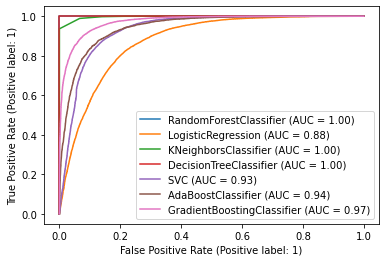

In [825]:
#For Training Data
disp = plot_roc_curve (RFC, x_train, y_train,)
plot_roc_curve (logreg, x_train, y_train, ax = disp.ax_)
plot_roc_curve (knn, x_train, y_train, ax = disp.ax_)
plot_roc_curve (dtc, x_train, y_train, ax = disp.ax_)
plot_roc_curve (svc, x_train, y_train, ax = disp.ax_)
plot_roc_curve (ada, x_train, y_train, ax = disp.ax_)
plot_roc_curve (gbr, x_train, y_train, ax = disp.ax_)

plt.legend (prop = {'size' : 10}, loc = 'lower right')
plt.show()

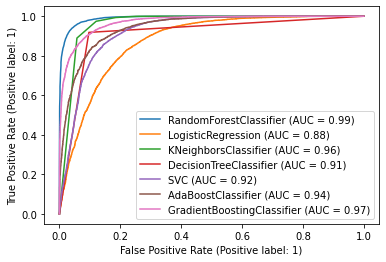

In [826]:
#For Tetsing Data
disp = plot_roc_curve (RFC, x_test, y_test)
plot_roc_curve (logreg, x_test, y_test, ax = disp.ax_)
plot_roc_curve (knn, x_test, y_test, ax = disp.ax_)
plot_roc_curve (dtc, x_test, y_test, ax = disp.ax_)
plot_roc_curve (svc, x_test, y_test, ax = disp.ax_)
plot_roc_curve (ada, x_test, y_test, ax = disp.ax_)
plot_roc_curve (gbr, x_test, y_test, ax = disp.ax_)

plt.legend (prop = {'size' : 10}, loc = 'lower right')
plt.show()

# <span style="color:green">Here we see that RandomForestClassifier has high AUC cure (i.e 0.99).

# <span style="color:red">****HyperParameter Tuning for RandomForestClassifier model****

In [988]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier

# Create the RandomizedSearchCV object
random_search = RandomizedSearchCV(
    RFC,
    param_distributions=parameters,
    n_iter=10,  
    scoring='accuracy', 
    cv=5,  
    verbose=1,
    n_jobs=-1,  
    random_state=42
)

# Fit the RandomizedSearchCV object to your data
random_search.fit(x_train, y_train)

# Print the best parameters found
print("Best Parameters:", random_search.best_params_)

# Get the best model
best_rf_model = random_search.best_estimator_

# Evaluate the best model on your test set
accuracy = best_rf_model.score(x_test, y_test)
print("Test Accuracy:", accuracy)


Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best Parameters: {'n_estimators': 100, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': 20, 'criterion': 'gini'}
Test Accuracy: 0.9441915693647338


# <span style="color:green">Here we see that after hperparameter tunning  my accuarcy slightly decrease. Hence don't considered it.

# Saving Model

In [957]:
import joblib
joblib.dump(RFC,'Model to Predict Customer Subscription To Term Deposit ')

['Model to Predict Customer Subscription To Term Deposit ']

# Model Prediction

In [958]:
rfc_model = joblib.load('Model to Predict Customer Subscription To Term Deposit ')
Customer = rfc_model.predict(x_test)
Customer

array([1, 0, 1, ..., 1, 0, 0])

# Prediction Comparision

In [959]:
test_data = np.array(y_test)
Customer_pred = pd.DataFrame({'predicted': Customer,'original':test_data})
Customer_pred

,predicted,original
0,1,1
1,0,0
2,1,1
3,0,0
4,1,1
...,...,...
15154,0,0
15155,0,0
15156,1,1
15157,0,0


# <span style="color:green">Here we see that  model predict accurately same as orignal result. Lets check model on test dataset.

# ----------------------Now working on Test dataset----------------------------------

In [960]:
df_test = pd.read_csv("https://raw.githubusercontent.com/dsrscientist/dataset5/main/termdeposit_test.csv")
df_test

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,38441,32,services,married,secondary,no,118,yes,no,cellular,15,may,20,6,-1,0,unknown
1,40403,78,retired,divorced,primary,no,2787,no,no,telephone,1,jul,372,1,-1,0,unknown
2,3709,31,self-employed,single,tertiary,no,144,yes,no,unknown,16,may,676,1,-1,0,unknown
3,37422,57,services,single,primary,no,3777,yes,no,telephone,13,may,65,2,-1,0,unknown
4,12527,45,blue-collar,divorced,secondary,no,-705,no,yes,unknown,3,jul,111,1,-1,0,unknown
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13559,23465,39,management,married,tertiary,no,45,no,no,cellular,28,aug,148,4,-1,0,unknown
13560,11743,54,blue-collar,married,primary,no,2281,yes,no,unknown,20,jun,158,1,-1,0,unknown
13561,28292,35,retired,married,primary,no,285,yes,no,cellular,29,jan,136,1,-1,0,unknown
13562,45163,29,admin.,single,secondary,no,464,no,no,cellular,9,nov,208,2,91,3,success


In [961]:
print(f'The rows and columns in the dataset:{df_test.shape}')
print(f'\n The columns in the dataset:{df_test.columns}')

The rows and columns in the dataset:(13564, 17)

 The columns in the dataset:Index(['ID', 'age', 'job', 'marital', 'education', 'default', 'balance',
       'housing', 'loan', 'contact', 'day', 'month', 'duration', 'campaign',
       'pdays', 'previous', 'poutcome'],
      dtype='object')


In [962]:
# getting all information of dataset 
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13564 entries, 0 to 13563
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   ID         13564 non-null  int64 
 1   age        13564 non-null  int64 
 2   job        13564 non-null  object
 3   marital    13564 non-null  object
 4   education  13564 non-null  object
 5   default    13564 non-null  object
 6   balance    13564 non-null  int64 
 7   housing    13564 non-null  object
 8   loan       13564 non-null  object
 9   contact    13564 non-null  object
 10  day        13564 non-null  int64 
 11  month      13564 non-null  object
 12  duration   13564 non-null  int64 
 13  campaign   13564 non-null  int64 
 14  pdays      13564 non-null  int64 
 15  previous   13564 non-null  int64 
 16  poutcome   13564 non-null  object
dtypes: int64(8), object(9)
memory usage: 1.8+ MB


<span style="color:BLUE">****Observation -There are two data types present in  dataset:(int64,Object)****                   
 <span style="color:blue">****- No null values are present in any column.****

In [963]:
#Checking Duplicate values in DataFrame
print("Total Dublicate rows are:",df_test.duplicated().sum())

Total Dublicate rows are: 0


In [964]:
#Checking the valuecount(i.e frequency of each value ) of each column 
for i in df_test.columns:
    print(df_test[i].value_counts())
    print("\n")

38441    1
23664    1
23378    1
18945    1
32574    1
        ..
4606     1
23686    1
35672    1
8550     1
34839    1
Name: ID, Length: 13564, dtype: int64


32    628
34    609
35    580
31    579
33    566
     ... 
95      1
86      1
92      1
89      1
90      1
Name: age, Length: 75, dtype: int64


blue-collar      2890
management       2819
technician       2290
admin.           1540
services         1251
retired           690
entrepreneur      479
self-employed     456
unemployed        398
housemaid         366
student           303
unknown            82
Name: job, dtype: int64


married     8119
single      3868
divorced    1577
Name: marital, dtype: int64


secondary    6978
tertiary     4000
primary      2043
unknown       543
Name: education, dtype: int64


no     13334
yes      230
Name: default, dtype: int64


 0       1044
 1         58
 2         47
 3         46
 4         44
         ... 
-140        1
 6495       1
 8180       1
 3684       1
 4256       1
Name: 

<span style="color:blue">****There is no Blank space present in dataset. Go ahead****

In [965]:
#Dropping ID column
df_test.drop("ID",axis=1,inplace =True)

In [966]:
#statical summary
df_test.describe()

,age,balance,day,duration,campaign,pdays,previous
count,13564.000000,13564.000000,13564.000000,13564.000000,13564.000000,13564.000000,13564.000000
mean,40.887128,1358.496535,15.738646,258.278679,2.759510,41.648555,0.594441
std,10.604108,3082.940623,8.288174,258.488648,3.060928,101.985178,1.998193
min,18.000000,-3313.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,71.000000,8.000000,102.000000,1.000000,-1.000000,0.000000
50%,39.000000,445.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1413.250000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,98417.000000,31.000000,3253.000000,58.000000,850.000000,55.000000


<span style="color:blue">****Observation-                 
The mean value is greater than median(50%) in "balance","duration","pdays" which means data is highly skewed right in these.     
Outliers are present in dataset because of high difference in 75% and max****

In [967]:
#Seperating Numerical and Categorical column

#checking for Categorical column
test_categorical_col=[]
for i in df_test.dtypes.index:
    if df_test.dtypes[i]=="object":
        test_categorical_col.append(i)
print("categorical_column",test_categorical_col)
print("\n")

#checking for Numerical column
test_numerical_col=[]
for i in df_test.dtypes.index:
    if df_test.dtypes[i]!="object":
        test_numerical_col.append(i)
print("Numerical_column",test_numerical_col)

categorical_column ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome']


Numerical_column ['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']


# <span style="color:red">Data Visualization

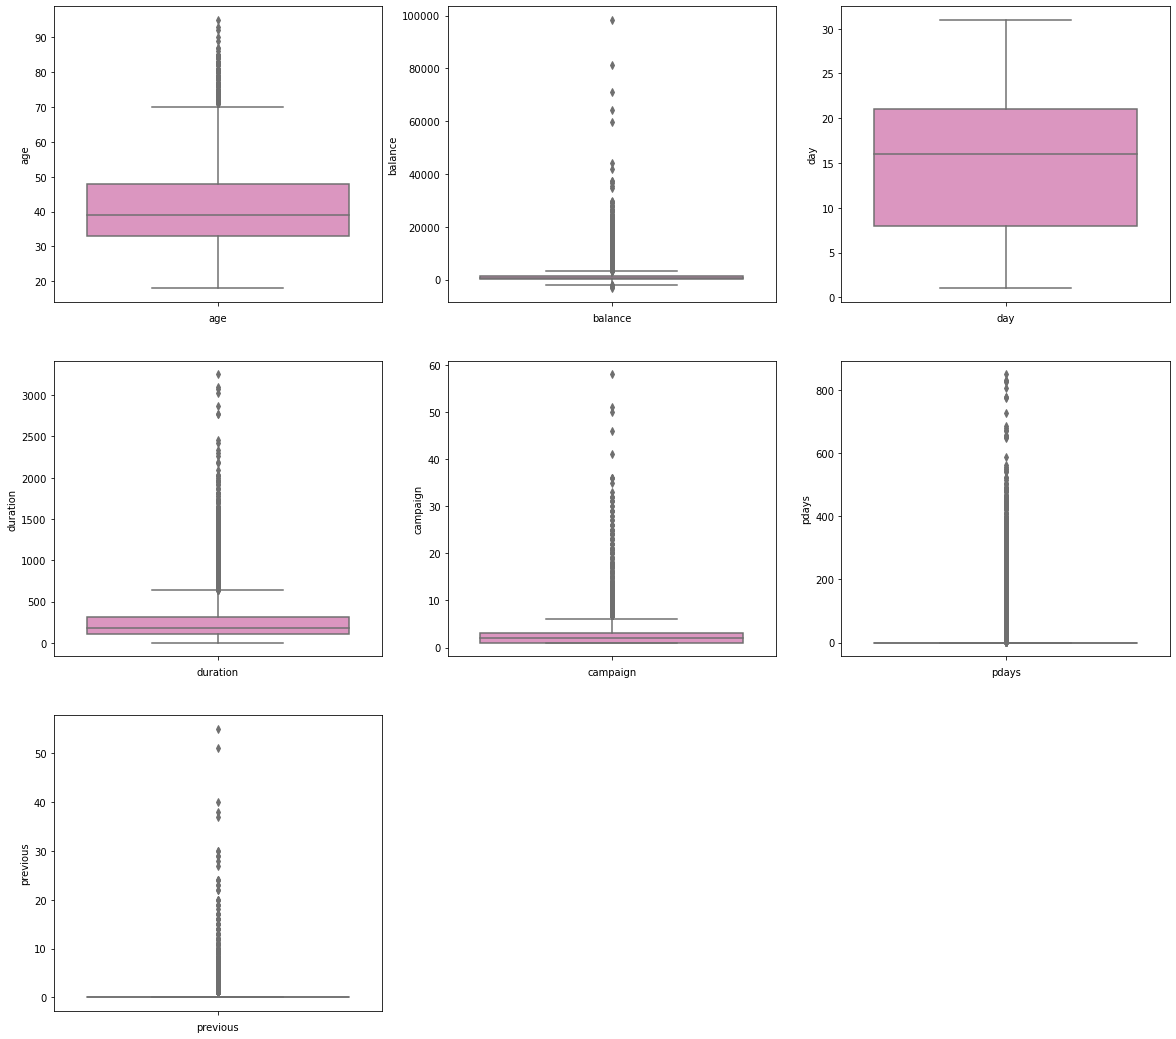

In [968]:
#checking outliers by using Boxplot in numerical_col only
plt.figure(figsize=(20,25))
p=1
for i in test_numerical_col:
    if p<=8:
        plt.subplot(4,3,p)
        sns.boxplot(y=df_test[i], palette="Set2_r")
        plt.xlabel(i)
    p+=1
plt.show()

<span style="color:blue">****Observation- Almost all Features has Outliers.Lets remove Outliers by Z-score method***

 Z-score method--

In [969]:
from scipy.stats import zscore
outliers_feature=df_test[['age', 'balance', 'day', 'duration', 'campaign',"previous","pdays"]]
z_test=np.abs(zscore(outliers_feature)) #.abs() to remove negative values
z_test

,age,balance,day,duration,campaign,previous,pdays
0,0.838114,0.402389,0.089124,0.921849,1.058702,0.297500,0.418199
1,3.499987,0.463375,1.778340,0.439963,0.574850,0.297500,0.418199
2,0.932421,0.393955,0.031534,1.616074,0.574850,0.297500,0.418199
3,1.519549,0.784508,0.330440,0.747754,0.248140,0.297500,0.418199
4,0.387871,0.669352,1.537023,0.569789,0.574850,0.297500,0.418199
...,...,...,...,...,...,...,...
13559,0.177969,0.426069,1.479434,0.426644,0.405281,0.297500,0.418199
13560,1.236630,0.299239,0.514168,0.387957,0.574850,0.297500,0.418199
13561,0.555195,0.348218,1.600092,0.473070,0.574850,0.297500,0.418199
13562,1.121034,0.290155,0.813073,0.194517,0.248140,1.203911,0.483926


In [970]:
#Z-score>3
np.where(z_test>3)

(array([    1,     9,    14, ..., 13550, 13555, 13563], dtype=int64),
 array([0, 6, 1, ..., 3, 4, 6], dtype=int64))

In [971]:
#now removing the data above zscore and creating a new dataframe
df1_test=df_test[(z_test<3).all(axis=1)]
print("New Dataframe having rows and column: " ,df1_test.shape)
print("New Dataframe column's name: " ,df1_test.columns)


New Dataframe having rows and column:  (12034, 16)
New Dataframe column's name:  Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome'],
      dtype='object')


In [972]:
print("Data Loss Percentage with Z-score method:",((df_test.shape[0]-df1_test.shape[0])/df_test.shape[0])*100)

Data Loss Percentage with Z-score method: 11.279858448835151


In [973]:
#Storing Dataframe with Z-score method in old dataframe
df_test=df1_test

In [974]:
#reset the index after removing outliers values
df_test.reset_index(drop=True,inplace=True)

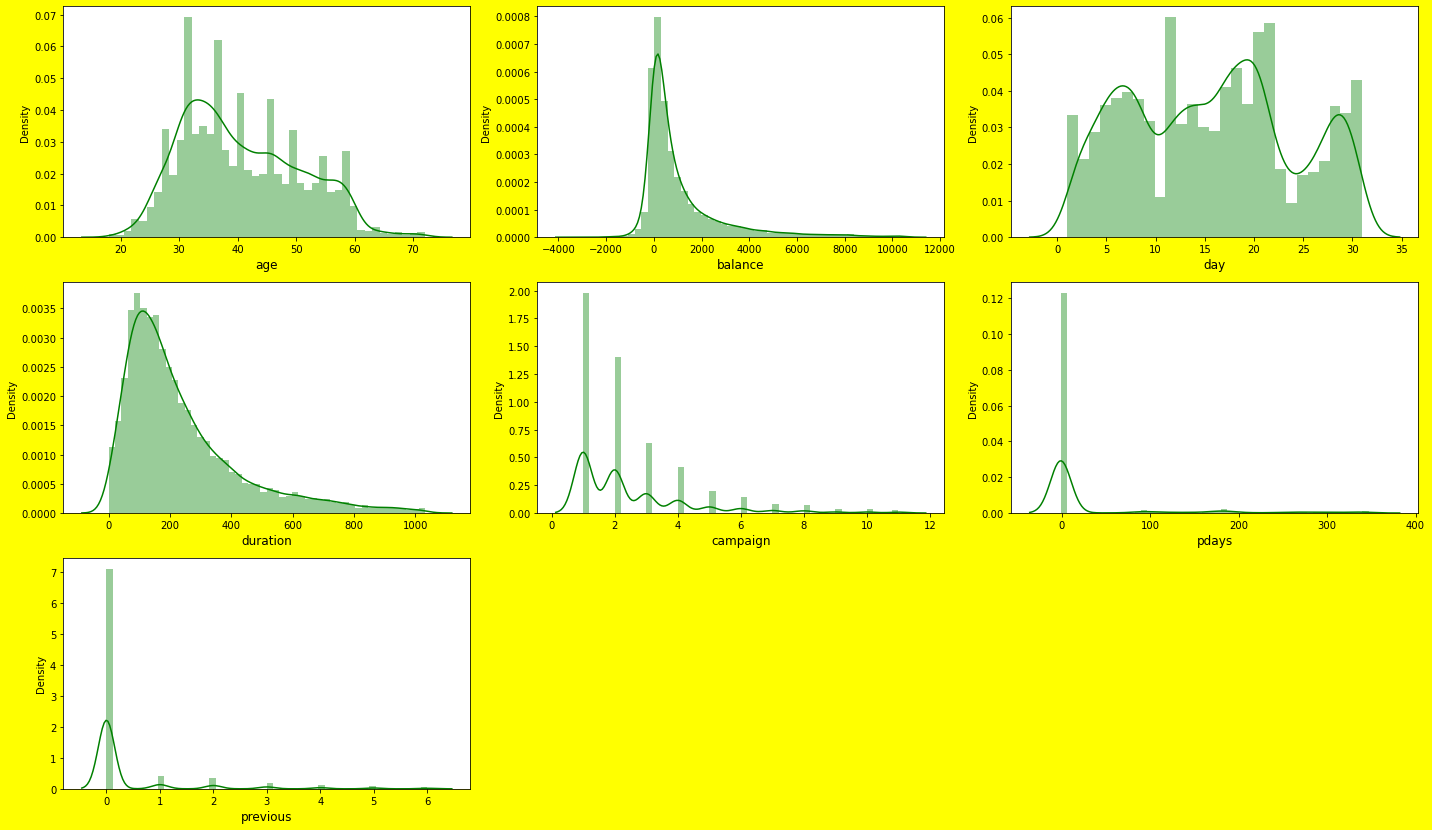

In [975]:
#Checking for data distribution in features only
plt.figure(figsize = (20,15), facecolor = 'yellow')
plotnumber = 1 #this is an initiator

for column in test_numerical_col:
    if plotnumber <=7: 
        ax = plt.subplot (4,3,plotnumber)
        sns.distplot (df_test[column],color='g')
        plt.xlabel (column, fontsize =12)
    plotnumber +=1
plt.tight_layout()

<span style="color:blue">****We can observe that data is not distributed normally.****

# <span style="color:red">****Removing Skewness****

In [976]:
df_test.skew() 

age         0.435270
balance     2.476671
day         0.100926
duration    1.578135
campaign    1.958366
pdays       2.728161
previous    3.398894
dtype: float64

<span style="color:BLUE">****There is Skewness present in features and  can be removed by following methods- log, square root,cube root or inverse transformation.****

In [977]:
#Removing Skewness using cuberoot method
df_test['balance']=np.cbrt(df_test['balance'])
df_test['duration']=np.cbrt(df_test['duration'])
df_test['previous']=np.cbrt(df_test['previous'])
df_test.skew()

age         0.435270
balance    -0.412190
day         0.100926
duration    0.290029
campaign    1.958366
pdays       2.728161
previous    2.198396
dtype: float64

In [978]:
#Removing Skewness using cuberoot method
df_test['campaign']=np.cbrt(df_test['campaign'])
df_test['pdays']=np.cbrt(df_test['pdays'])
df_test['previous']=np.cbrt(df_test['previous'])
df_test.skew()

age         0.435270
balance    -0.412190
day         0.100926
duration    0.290029
campaign    0.961277
pdays       2.106077
previous    2.024414
dtype: float64

In [979]:
#storing test dataset into new dataframe 
df_test_new=df_test

# <span style="color:Purple">****Encoding Categorical Value in Numerical Value****

In [980]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
for column in df_test.columns:
    if df_test[column].dtype == 'object':
        df_test[column] = label_encoder.fit_transform(df_test[column])

<AxesSubplot:>

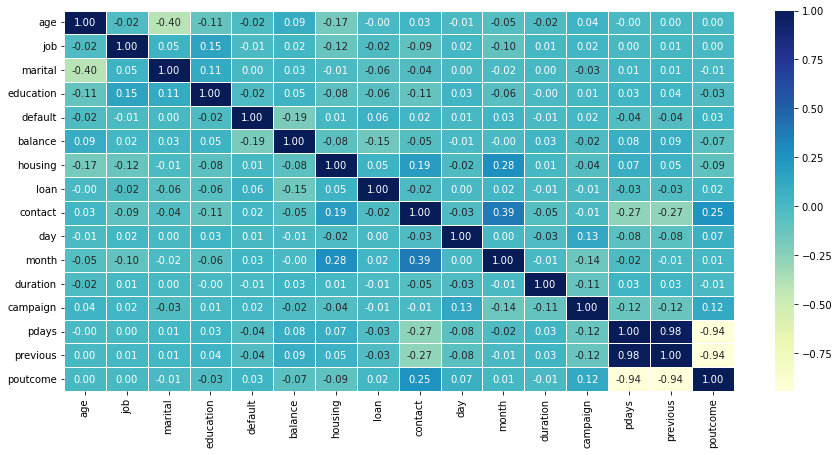

In [981]:
#checking the corelation  again using heatmaps (only absolute values)
plt.figure(figsize = (15,7))
sns.heatmap(df_test.corr(), annot = True, linewidths=0.5, fmt='.2f',cmap = "YlGnBu")

# <span style="color:red">****Feature Scaling Using Standard Scaler**** 

In [982]:
# data scaling 
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_scaled_test = pd.DataFrame(scaler.fit_transform(df_test),columns=df_test.columns)
x_scaled_test

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,-0.857298,0.802830,-0.273350,-0.298454,-0.134234,-0.362324,0.897827,-0.436241,-0.725087,-0.085446,0.846484,-1.940045,1.840045,-0.407972,-0.412828,0.390323
1,-0.956183,0.498452,1.368116,1.050250,-0.134234,-0.307873,0.897827,-0.436241,1.472546,0.035213,0.846484,1.912430,-0.949881,-0.407972,-0.412828,0.390323
2,1.614839,0.802830,1.368116,-1.647159,-0.134234,1.363415,0.897827,-0.436241,0.373729,-0.326763,0.846484,-1.109865,-0.062423,-0.407972,-0.412828,0.390323
3,0.428213,-1.023436,-1.914817,-0.298454,-0.134234,-2.595425,-1.113800,2.292308,1.472546,-1.533350,-0.156594,-0.610877,-0.949881,-0.407972,-0.412828,0.390323
4,-0.857298,-0.110303,1.368116,1.050250,-0.134234,-1.155737,0.897827,-0.436241,-0.725087,0.759165,-0.156594,1.222888,-0.062423,-0.407972,-0.412828,0.390323
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12029,-0.857298,1.411585,1.368116,-0.298454,-0.134234,-0.338398,0.897827,-0.436241,-0.725087,-1.050715,0.846484,0.130259,-0.949881,-0.407972,-0.412828,0.390323
12030,-0.165099,-0.110303,-0.273350,1.050250,-0.134234,-0.580373,-1.113800,-0.436241,-0.725087,1.483117,-1.494030,-0.303493,1.055705,-0.407972,-0.412828,0.390323
12031,1.318182,-1.023436,-0.273350,-1.647159,-0.134234,0.973614,0.897827,-0.436241,1.472546,0.517848,0.177765,-0.229425,-0.949881,-0.407972,-0.412828,0.390323
12032,-0.560641,0.194074,-0.273350,-1.647159,-0.134234,-0.091217,0.897827,-0.436241,-0.725087,1.603776,-0.490953,-0.396920,-0.949881,-0.407972,-0.412828,0.390323


In [983]:
#Dropping poutcome,campaign,loan
x_scaled_test.drop(["poutcome","previous","pdays"],axis=1,inplace=True)
x_scaled_test.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign'],
      dtype='object')

# <span style="color:brown"> Lets check model on test dataset.

In [984]:
rfc_model = joblib.load('Model to Predict Customer Subscription To Term Deposit ')
Customer_test = rfc_model.predict(x_scaled_test)
Customer_test

array([0, 1, 0, ..., 0, 0, 1])

In [986]:
#creating a new column in test dataset
df_test_new['subscribed'] = Customer_test
df_test_new['subscribed'] = df_test_new['subscribed'].replace({0: 'no', 1: 'yes'})
df_test_new

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,32,7,1,1,0,4.904868,1,0,0,15,8,2.714418,1.817121,-1.000000,0.000000,3,no
1,31,6,2,2,0,5.241483,1,0,2,16,8,8.776383,1.000000,-1.000000,0.000000,3,yes
2,57,7,2,0,0,15.573360,1,0,1,13,8,4.020726,1.259921,-1.000000,0.000000,3,no
3,45,1,0,1,0,-8.900130,0,1,2,3,5,4.805896,1.000000,-1.000000,0.000000,3,no
4,32,4,2,2,0,0.000000,1,0,0,22,5,7.691372,1.259921,-1.000000,0.000000,3,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12029,32,9,2,1,0,5.052774,1,0,0,7,8,5.972093,1.000000,-1.000000,0.000000,3,yes
12030,39,4,1,2,0,3.556893,0,0,0,28,1,5.289572,1.587401,-1.000000,0.000000,3,no
12031,54,1,1,0,0,13.163613,1,0,2,20,6,5.406120,1.000000,-1.000000,0.000000,3,no
12032,35,5,1,0,0,6.580844,1,0,0,29,4,5.142563,1.000000,-1.000000,0.000000,3,no


<span style="color:blue">****End.****